In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing data
eda_data = pd.read_csv('clean.csv')
eda_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'enrollee_id', 'city',
       'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target', 'city_id', 'city_dev_perc',
       'experience_lvl', 'company_class'],
      dtype='object')

In [3]:
#selecting nacessary columns
eda_df = eda_data[['gender', 'relevent_experience','enrolled_university', 'education_level', 'major_discipline', 'company_type', 'last_new_job','training_hours', 'target', 'city_id', 'city_dev_perc','experience_lvl', 'experience','company_class']]
eda_df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,last_new_job,training_hours,target,city_id,city_dev_perc,experience_lvl,experience,company_class
0,1,1,no_enrollment,Graduate,STEM,NaN,1,36,1.0,103,92.0,expert_lvl,>20,unknown
1,1,0,no_enrollment,Graduate,STEM,Pvt Ltd,>4,47,0.0,40,77.6,expert_lvl,15,small_company
2,0,0,Full time course,Graduate,STEM,NaN,0,83,0.0,21,62.4,mid_lvl,5,unknown
3,0,0,NaN,Graduate,Business Degree,Pvt Ltd,0,52,1.0,115,78.9,entry_lvl,<1,unknown
4,1,1,no_enrollment,Masters,STEM,Funded Startup,4,8,0.0,162,76.7,expert_lvl,>20,small_company


## Analisng target distribution

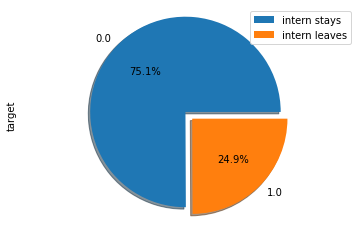

In [4]:
total = eda_df['target'].value_counts()
fig1 = total.plot.pie(shadow=True, explode=(0,0.1),startangle=0,autopct='%1.1f%%')
labels = ['intern stays','intern leaves']
plt.legend(labels)
plt.axis('equal')
plt.show()

## Analsing Intern stays

In [5]:
intern_stays = eda_df.loc[eda_df['target'] == 0]

### creating bar chart to analyse columns

In [6]:
bar_chart = intern_stays[['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type','last_new_job','experience_lvl','company_class']]

graph for gender: total = 3


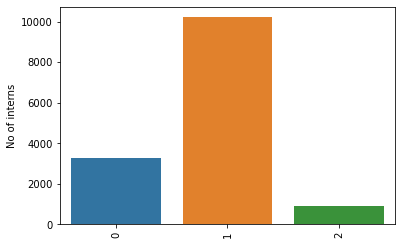

graph for relevent_experience: total = 2


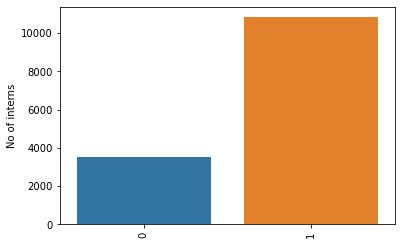

graph for enrolled_university: total = 3


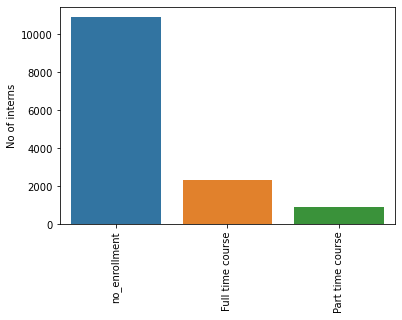

graph for education_level: total = 5


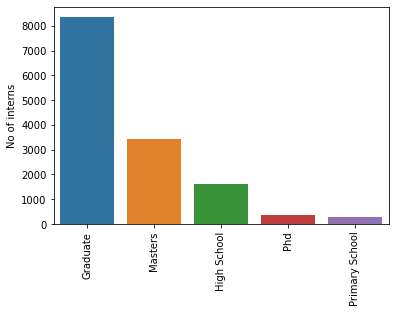

graph for major_discipline: total = 6


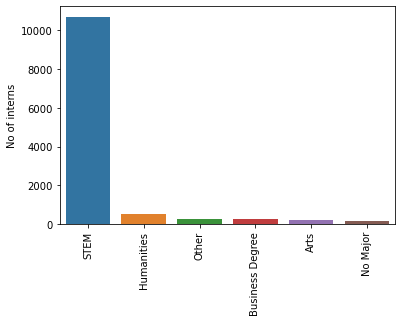

graph for company_type: total = 6


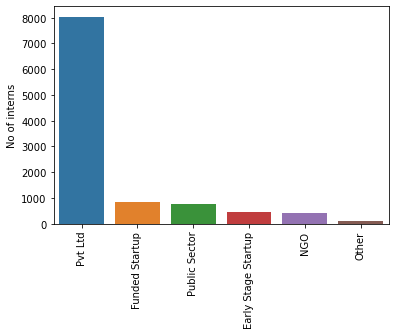

graph for last_new_job: total = 6


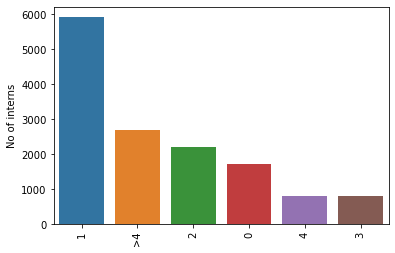

graph for experience_lvl: total = 5


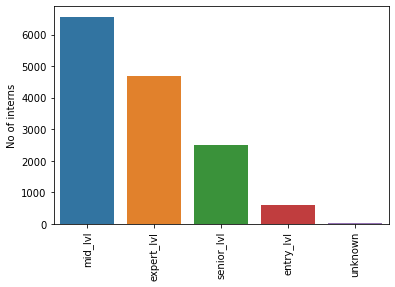

graph for company_class: total = 5


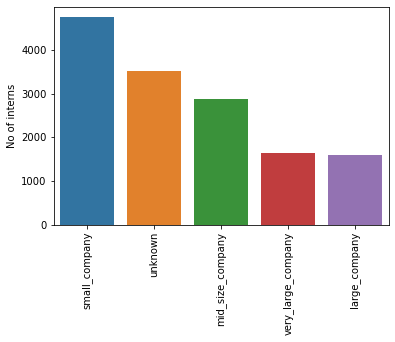

In [7]:
for i in bar_chart.columns:
    num=bar_chart[i].value_counts()
    
    print("graph for %s: total = %d" % (i,len(num)))
    chart = sns.barplot(x=num.index,y=num)
    plt.ylabel("No of interns")
    plt.xticks(rotation=90)
    plt.show()

### Histograms and boxplots for a better understanding of values


Text(0.5, 1.0, 'City development Percentage, Histogram')

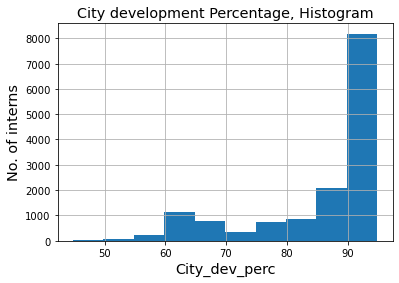

In [8]:
#city development-histogram
hist1 = intern_stays.city_dev_perc.hist()
plt.ylabel('No. of interns',size='x-large')
plt.xlabel('City_dev_perc',size='x-large')
plt.title('City development Percentage, Histogram',size='x-large')

Text(0.5, 1.0, 'Cities , Histogram')

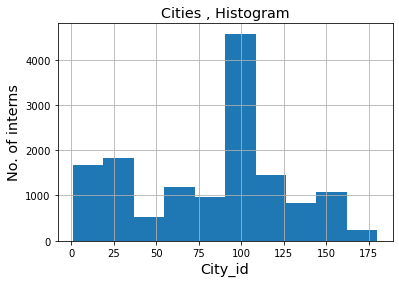

In [9]:
#histogram for cities
hist2 = intern_stays.city_id.hist()
plt.ylabel('No. of interns',size='x-large')
plt.xlabel('City_id',size='x-large')
plt.title("Cities , Histogram",size='x-large')

Text(0.5, 1.0, 'Experience')

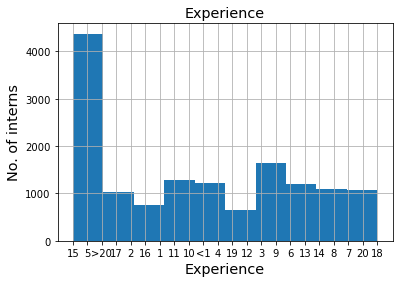

In [10]:
#histogram for experience
hist3 = intern_stays.experience.hist()
plt.ylabel('No. of interns',size='x-large')
plt.xlabel('Experience',size='x-large')
plt.title("Experience",size='x-large')

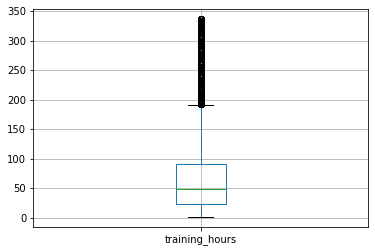

In [11]:
#boxplot - Training hours
box1 =intern_stays.boxplot(column = ['training_hours'])

## Pivot Tables


In [12]:
eda_df.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_type', 'last_new_job',
       'training_hours', 'target', 'city_id', 'city_dev_perc',
       'experience_lvl', 'experience', 'company_class'],
      dtype='object')

In [13]:
pt1 = pd.pivot_table(eda_data, index='target',columns = 'experience_lvl', values='city_dev_perc')

In [14]:
pt2 = pd.pivot_table(eda_data, index=['target','company_class',], values='city_dev_perc')

In [15]:
pt3 = pd.pivot_table(eda_data, index=['target','gender',], values='training_hours')


In [16]:
pt4 = pd.pivot_table(eda_data, index=['target','company_class',], values='training_hours')

In [17]:
pt5 = pd.pivot_table(eda_data, index=['target','major_discipline',], values='training_hours')

In [18]:
pt6 = pd.pivot_table(eda_data, index=['target','education_level',], values='training_hours')


In [19]:
eda_df

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type,last_new_job,training_hours,target,city_id,city_dev_perc,experience_lvl,experience,company_class
0,1,1,no_enrollment,Graduate,STEM,NaN,1,36,1.0,103,92.0,expert_lvl,>20,unknown
1,1,0,no_enrollment,Graduate,STEM,Pvt Ltd,>4,47,0.0,40,77.6,expert_lvl,15,small_company
2,0,0,Full time course,Graduate,STEM,NaN,0,83,0.0,21,62.4,mid_lvl,5,unknown
3,0,0,NaN,Graduate,Business Degree,Pvt Ltd,0,52,1.0,115,78.9,entry_lvl,<1,unknown
4,1,1,no_enrollment,Masters,STEM,Funded Startup,4,8,0.0,162,76.7,expert_lvl,>20,small_company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1,0,no_enrollment,Graduate,Humanities,Public Sector,4,15,NaN,103,92.0,expert_lvl,16,unknown
21283,1,1,no_enrollment,Masters,STEM,NaN,2,30,NaN,136,89.7,expert_lvl,18,unknown
21284,1,0,no_enrollment,Primary School,NaN,Pvt Ltd,0,18,NaN,100,88.7,mid_lvl,3,unknown
21285,1,1,Full time course,High School,NaN,Public Sector,1,84,NaN,102,80.4,mid_lvl,7,mid_size_company


In [20]:
model_df = eda_df.drop(columns = 'experience')
model_df = model_df[model_df['target'].notna()]

In [21]:
model_df.to_csv('model_df.csv')